# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load your data and rename Date to Date
data = pd.read_csv('../DataSet/data_daily.csv')
data = data.rename(columns={'Date': 'Date'})

## Distribution Analysis

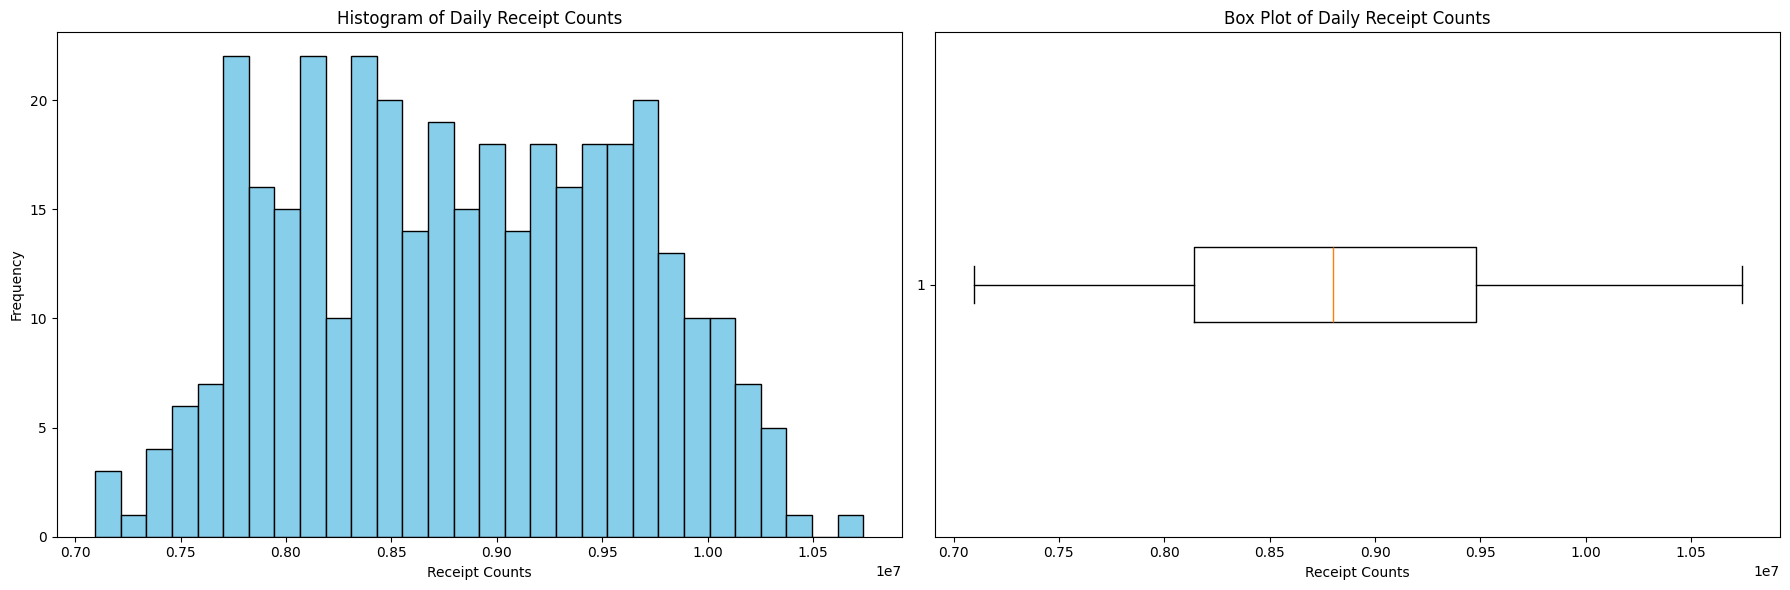

In [5]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram
ax[0].hist(data['Receipt_Count'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Daily Receipt Counts')
ax[0].set_xlabel('Receipt Counts')
ax[0].set_ylabel('Frequency')

# Box plot
ax[1].boxplot(data['Receipt_Count'], vert=False)
ax[1].set_title('Box Plot of Daily Receipt Counts')
ax[1].set_xlabel('Receipt Counts')

plt.tight_layout()
plt.show()

### Distribution Analysis Findings:

#### Histogram:

The distribution of receipt counts appears to be multimodal with many peak.
This could be a pattern but to find a pattern having more domain knowledge is essential.

#### Box Plot:

The box plot provides a visual representation of the spread and skewness of the data.
The median (the line inside the box) is slightly to the left, indicating a minor left skew.
There don't appear to be any significant outliers on either end, as no data points lie beyond the whiskers of the box plot.

## Time Series Decomposition

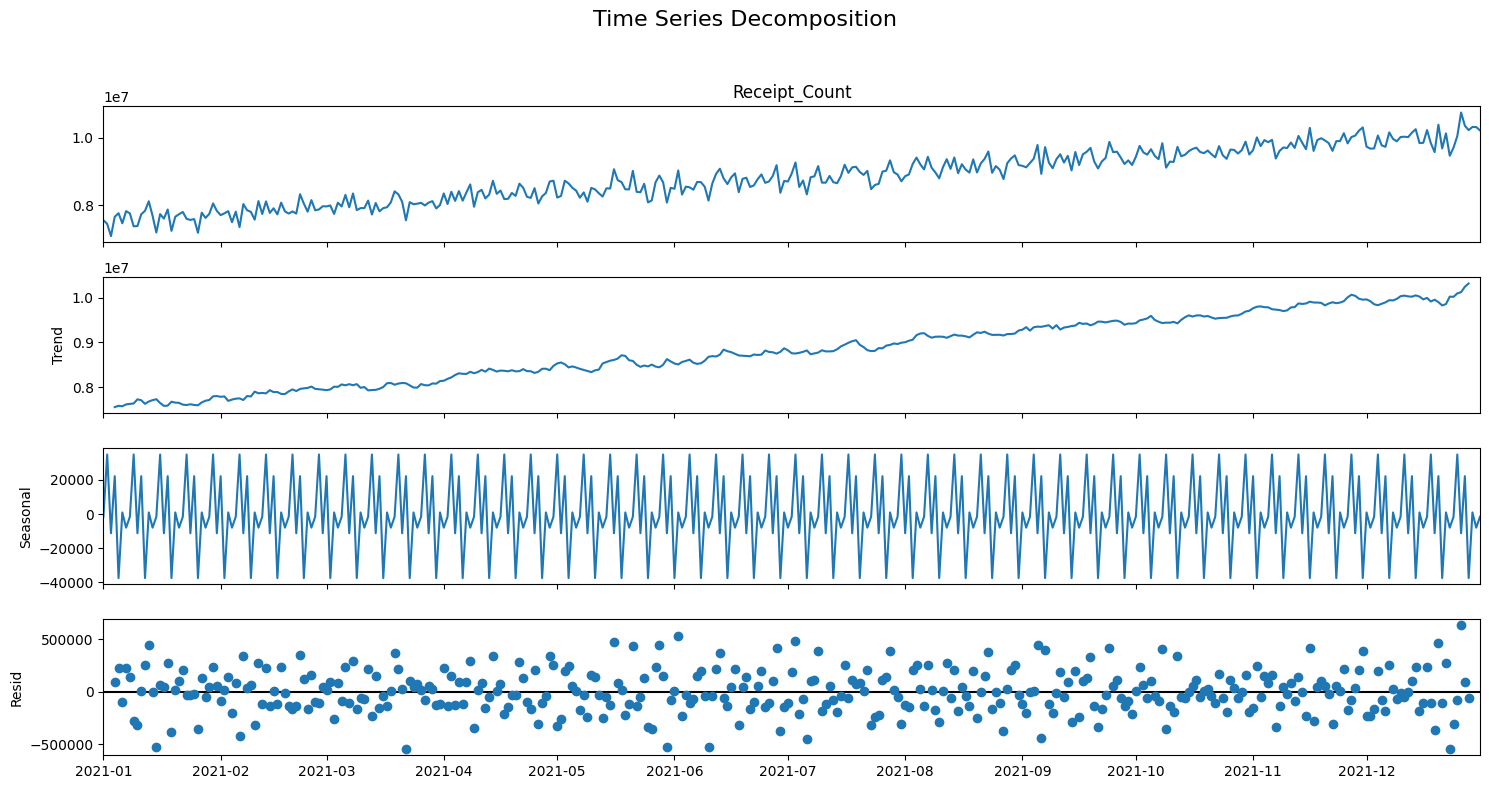

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for time series decomposition
data_ts = data.set_index('Date')

# Decompose the time series
decomposition = seasonal_decompose(data_ts['Receipt_Count'], model='additive')

# Plot the decomposed time series
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Time Series Decomposition Findings:

#### Observed:
- This is the original time series data, which shows the daily receipt counts.

#### Trend:
- The trend component captures the underlying pattern in the data, smoothing out short-term fluctuations.
- The receipt count seems to be increasing

#### Seasonal:
- The seasonal component captures regular patterns that repeat over time.
- A clear seasonality is observed, suggesting that there are repetitive patterns in receipt counts throughout the year.
- This seasonality seems to be of a shorter duration, possibly weekly.

#### Residual:
- The residuals represent the difference between the observed data and the combined trend and seasonal components.
- The residuals should ideally be random white noise without any discernible pattern.

### Seasonal Patterns

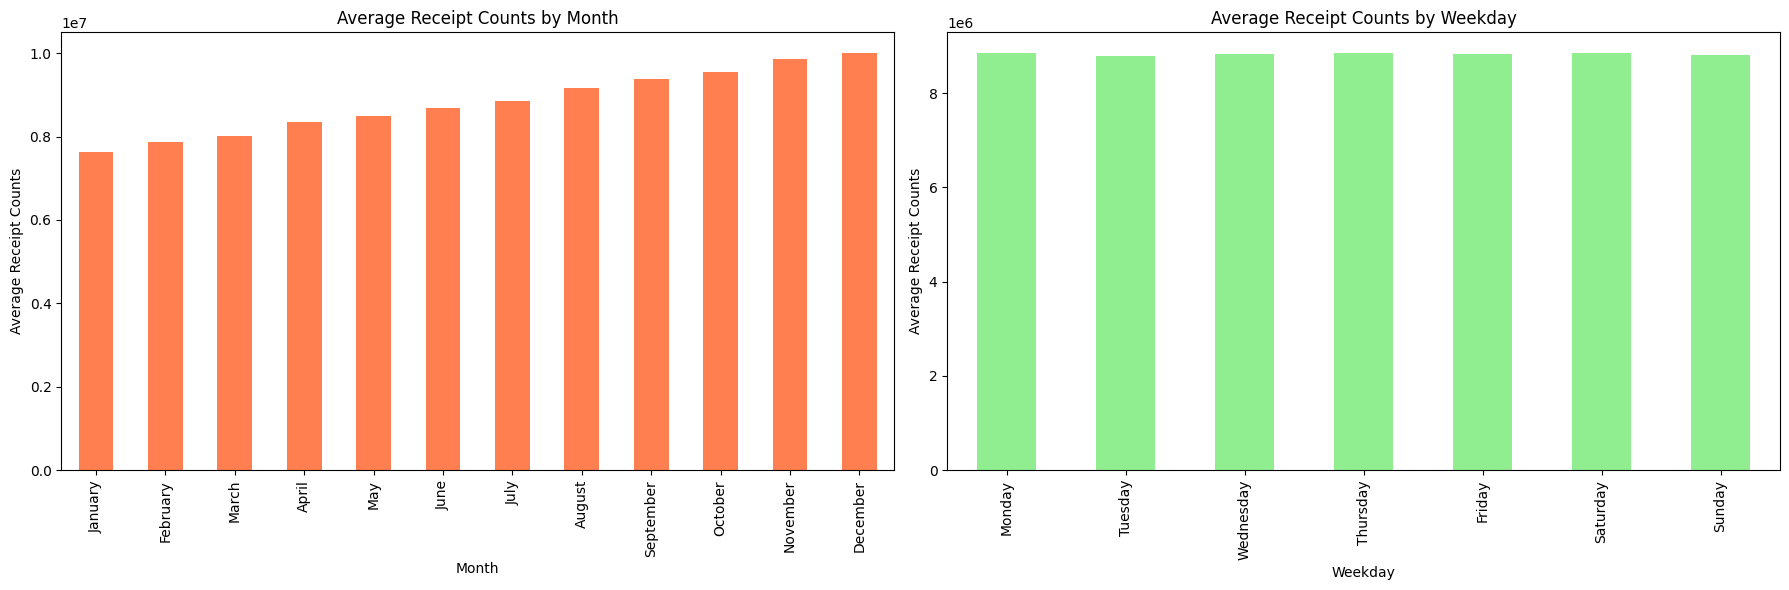

In [10]:
# Extract month and weekday from the Date
data['Month'] = data['Date'].dt.month_name()
data['Weekday'] = data['Date'].dt.day_name()

# Group by month and weekday to get average receipt counts
monthly_avg = data.groupby('Month')['Receipt_Count'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
weekday_avg = data.groupby('Weekday')['Receipt_Count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Monthly Average
monthly_avg.plot(kind='bar', ax=ax[0], color='coral')
ax[0].set_title('Average Receipt Counts by Month')
ax[0].set_ylabel('Average Receipt Counts')
ax[0].set_xlabel('Month')

# Weekday Average
weekday_avg.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average Receipt Counts by Weekday')
ax[1].set_ylabel('Average Receipt Counts')
ax[1].set_xlabel('Weekday')

plt.tight_layout()
plt.show()


#### Monthly Patterns:
- Receipt count seems to be increasing every month

#### Weekly Patterns:
- There isn't any noticeable difference on receipt count by weekday

### Autocorrelation and Partial Autocorrelation

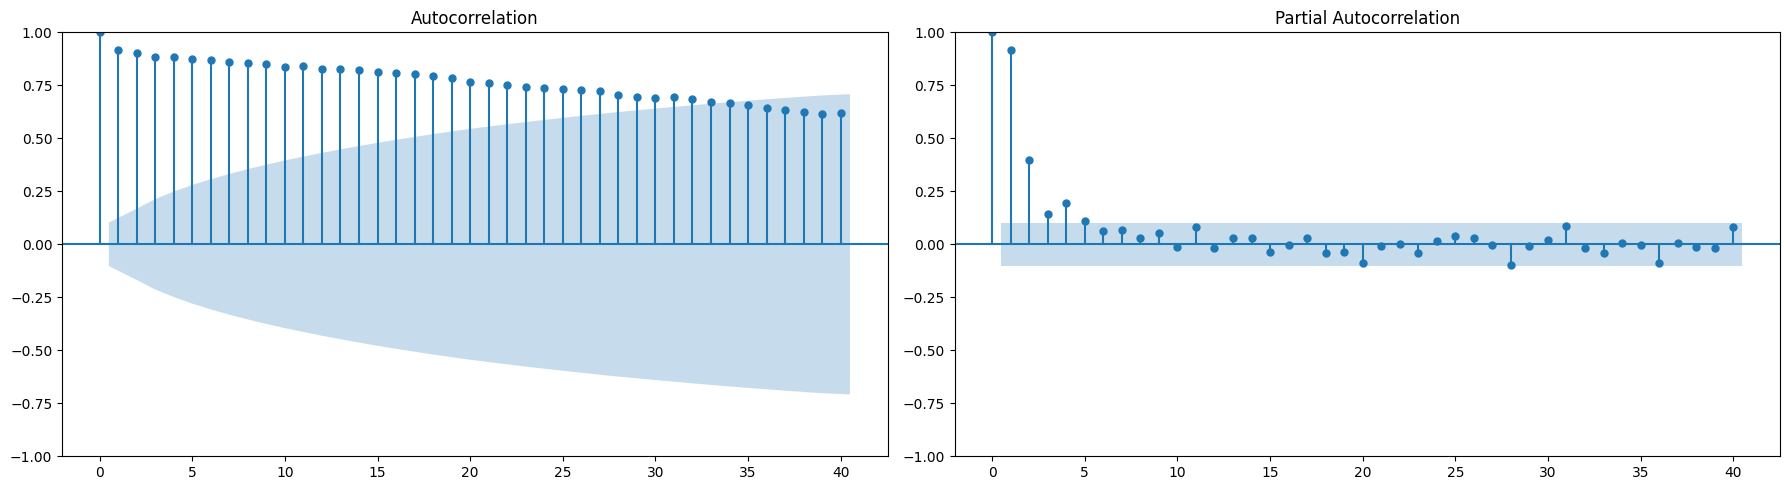

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Autocorrelation (ACF) plot
plot_acf(data['Receipt_Count'], lags=40, ax=ax[0])

# Partial Autocorrelation (PACF) plot
plot_pacf(data['Receipt_Count'], lags=40, ax=ax[1])

plt.tight_layout()
plt.show()


### Autocorrelation and Partial Autocorrelation Findings:

#### Autocorrelation (ACF):

- This plot shows the correlation of the series with its own lags.
- The spikes represent the correlation value at different lags. A spike outside the blue shaded region is statistically significant.
- We observe a strong autocorrelation at the first few lags, which gradually decreases. The recurring significant peaks suggest a weekly seasonality, as the peaks appear roughly every 7 lags.

#### Partial Autocorrelation (PACF):

- This plot shows the correlation of the series with its own lags after removing the effect of previous lags.
- Like the ACF, spikes outside the blue shaded region are statistically significant.
- The PACF has significant spikes at lags 1 and 2, then drops off. This suggests that the value of Receipt_Count might be influenced by its values 1 and 2 days prior.

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model("../fetchChallenge.h5")
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 20)                1380      
                                                                 
 repeat_vector_22 (RepeatVe  (None, 30, 20)            0         
 ctor)                                                           
                                                                 
 gru_9 (GRU)                 (None, 30, 10)            960       
                                                                 
 time_distributed_22 (TimeD  (None, 30, 1)             11        
 istributed)                                                     
                                                                 
Total params: 2351 (9.18 KB)
Trainable params: 2351 (9.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
import ipykernel
ipykernel.default_kernel

AttributeError: module 'ipykernel' has no attribute 'default_kernel'